#Statistics 


In [0]:
# Import required libraries

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

### Quick Definitions

- Mean: Average 
- Median : Middle observation in sorted order
- Mode : Most frequent
- Range : Highest - Lowest
- Variance : Expected squared deviation from mean/ Mean of squares - Square of mean  
- Stdandard deviation : Root of mean
- Covariance : Mean of product of deviations of two R.Vs
- Correlation : Divide Covariance by std. dev of each R.V


###  Sample versus Population

Difference: A population is the set of all observations/elements you have.A selectinon of a few observations from this is termed as the sample. Accordingly the formulae change.

### Variance
<img src="https://mathbitsnotebook.com/Algebra1/StatisticsData/popformula2.gif"/>

*Why the $n-1$?  *

Read up true unbiased estimator and how to use sample variance to estimate population variance: **Bessels Correction**


* What if you want to find covariance?* 

### Statistical Visualizations

### Histogram

Bin your data into smaller ranges and calculate frequency of each bin.

Columns in dataset: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


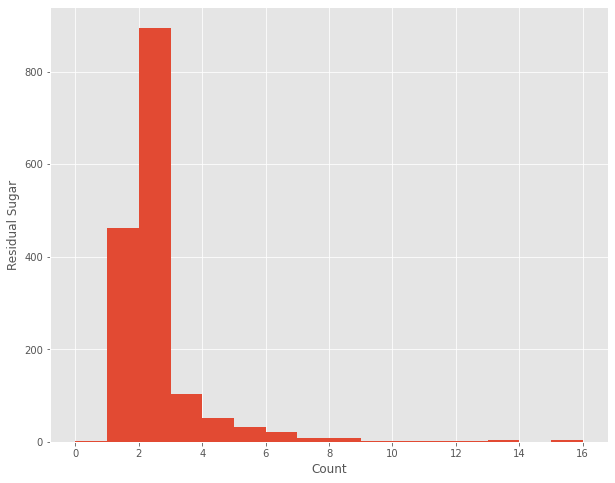

In [4]:
# Read dataset
df = pd.read_csv('./winequality-red.csv',sep=';')
print(f'Columns in dataset: {list(df.columns)}')
print(df.head())

# Create histogram
bin_edges = np.arange(0, df['residual sugar'].max() + 1, 1)

# Add plot labels
plt.figure(figsize=(10,8))
fig = plt.hist(df['residual sugar'], bins=bin_edges)
plt.xlabel('Count')
plt.ylabel('Residual Sugar')
plt.show()

In [0]:
import requests # Read from URL directly

def image_from_url(url) :
    """Get image from url"""
    response = requests.get(url)
    image = np.asarray(bytearray(response.content), dtype = 'uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    return image

### Histogram Of Intensities

Histograms used to be really useful (and still are) for computer vision.

Intensity histograms gives us low-level information of what is in the seen and the colors give a crude semantic understanding. But not limited to intensity histograms. 

We can extend it to any 'feature' of an image such as gradients! Gives even more useful information.

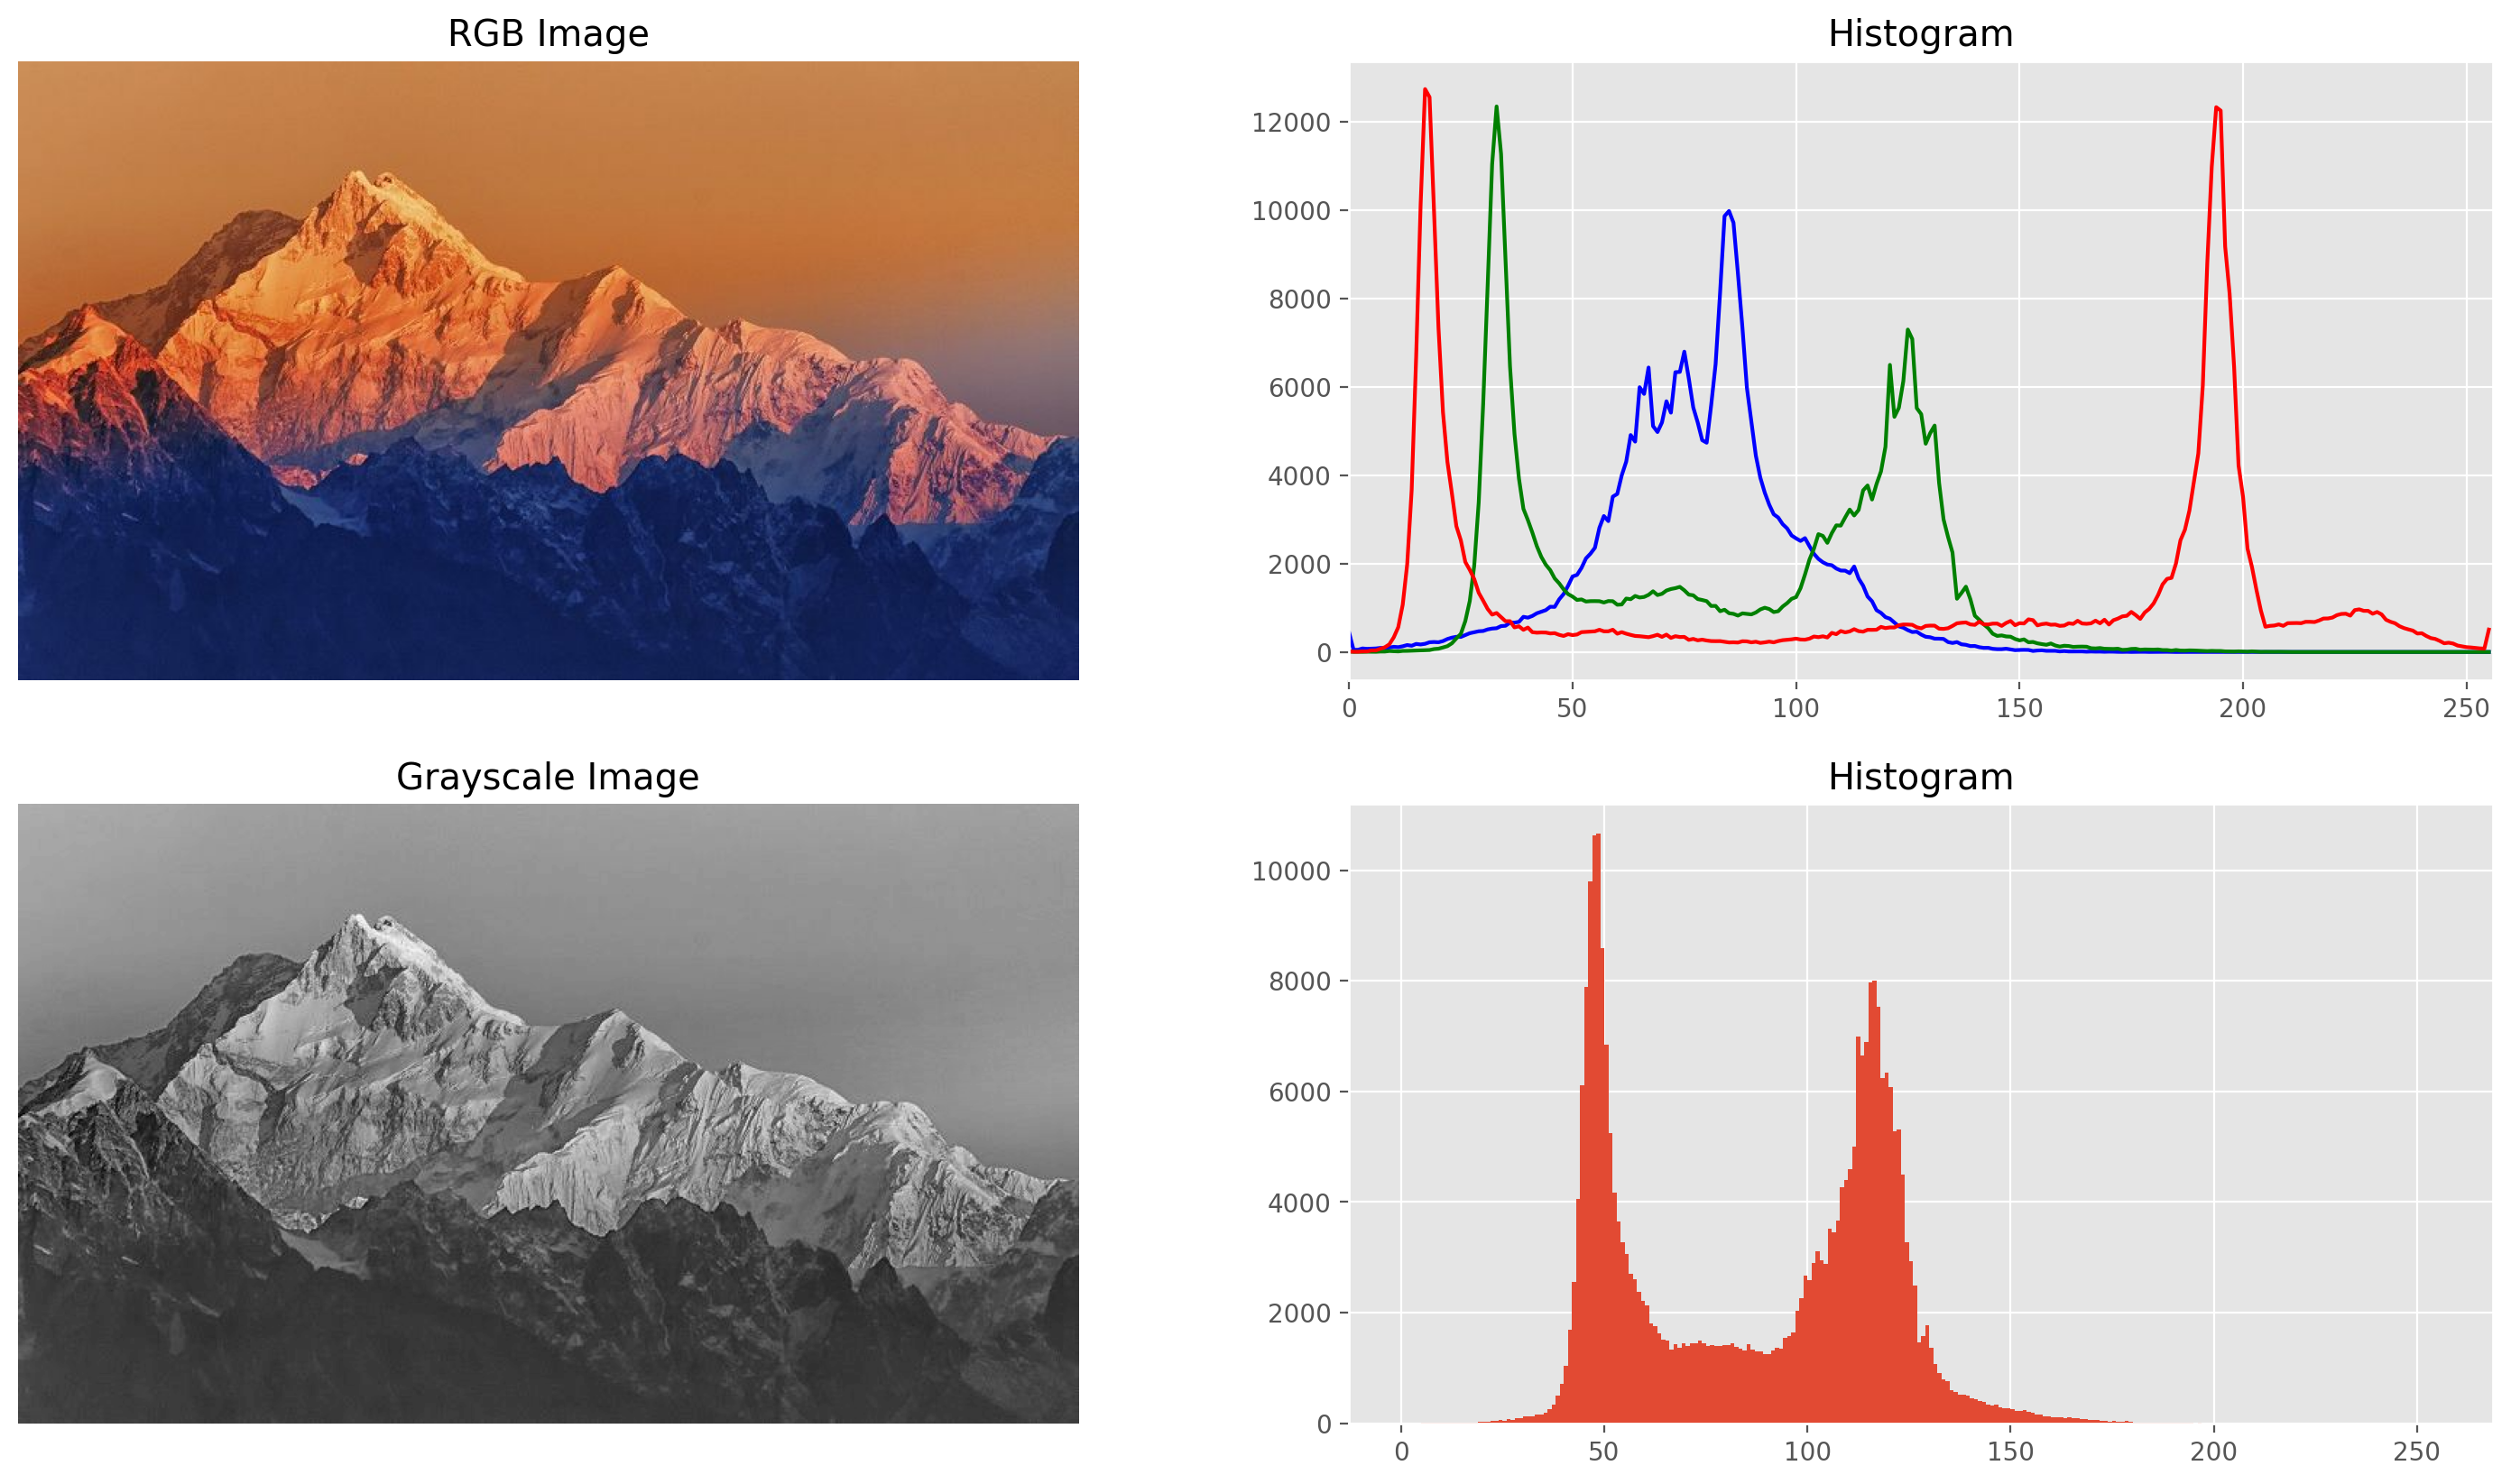

In [6]:
# Define channel colors
color = ('blue','green','red')

url = "https://www.worldatlas.com/r/w1200-h701-c1200x701/upload/66/14/d8/kangchenjunga.jpg"
image = image_from_url(url)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(18,10), dpi=200)
plt.subplot(2,2,1);plt.title('RGB Image');plt.grid(False);plt.axis(False)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2,2,2)
plt.title('Histogram')
for idx, c in enumerate(color):
    hist = cv2.calcHist([image],[idx], None, [256], [0,256])
    plt.plot(hist, color = c)
    plt.xlim([0, 256])

plt.subplot(2,2,3);plt.title('Grayscale Image');plt.grid(False);plt.axis(False);plt.imshow(gray, cmap='gray')
plt.subplot(2,2,4)
plt.title('Histogram')
plt.hist(gray.ravel(),256,[0,256])
plt.show()

### Histogram Of Oriented Gradients Descriptor

The image is divided into uniform sized blocks.

Gradient along directions can be calculated for each pixel in the block are calculated. The number of directions/orientations can be $8$.

A single pixel will have a single orientation gradient.

So a histogram is obatined for the block where the X axis categories are the orientations. The Y axis is the number of pixels that have a gradient in that orientation.

For each block a majority gradient/ most common gradient  is displayed based on what gradient is seen more across every pixel in the block.



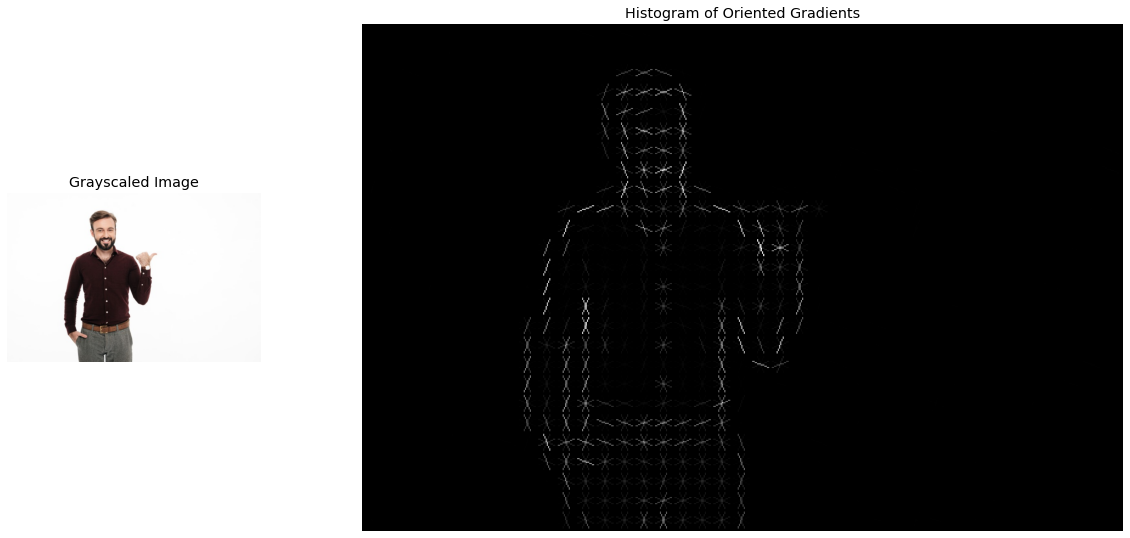

In [8]:
from skimage.feature import hog
from skimage import data, color, exposure

def hog_ft(image) :
    """Compute and display HOG descriptor for an image"""
    # Blocks of 16 x 16
    fd, hog_image = hog(image, orientations=4, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True, gridspec_kw={'width_ratios': [1, 3]})

    ax[0].axis('off')
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Grayscaled Image')
    ax[0].set_adjustable('box')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

    ax[1].axis('off')
    ax[1].imshow(hog_image, cmap=plt.cm.gray)
    ax[1].set_title('Histogram of Oriented Gradients')
    ax[1].set_adjustable('box')

    plt.show()


image = image_from_url("https://img.freepik.com/free-photo/portrait-smiling-happy-man-standing_171337-4831.jpg?size=626&ext=jpg")
hog_ft(image)

However, may not give useful information in all cases.

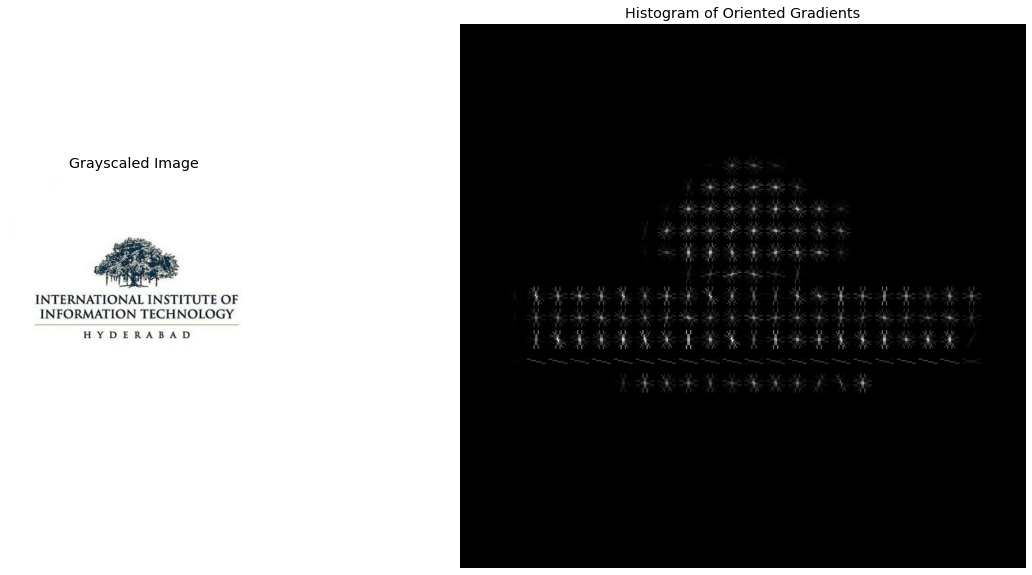

In [0]:
image = image_from_url("https://cdn.telanganatoday.com/wp-content/uploads/2018/08/IIITH_Logo-416x400-416x400.jpg")
hog_ft(image)

### Scatterplot

Visualize a 2D/3D plot to observe variation of one random variable wrt another.

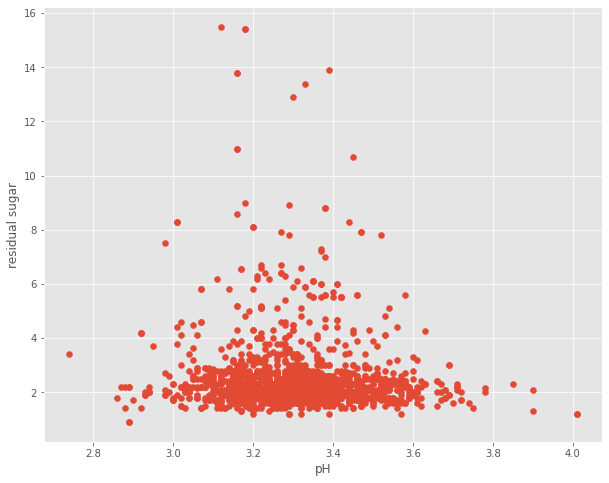

In [0]:
plt.figure(figsize=(10,8))
fig = plt.scatter(df['pH'], df['residual sugar'])
plt.xlabel('pH')
plt.ylabel('Residual Sugar')
plt.show()

## Covariance Matrix

Covariance between the values a random variable can take.

Shows the relationship between $n$ variables.

Covariance of a variable with itself will be highest. Hence the diagonal will have darker values.

**>** Read definitions and concept here.

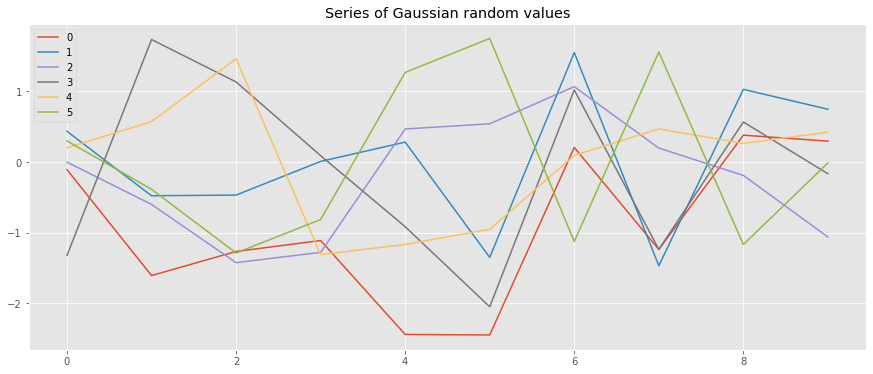

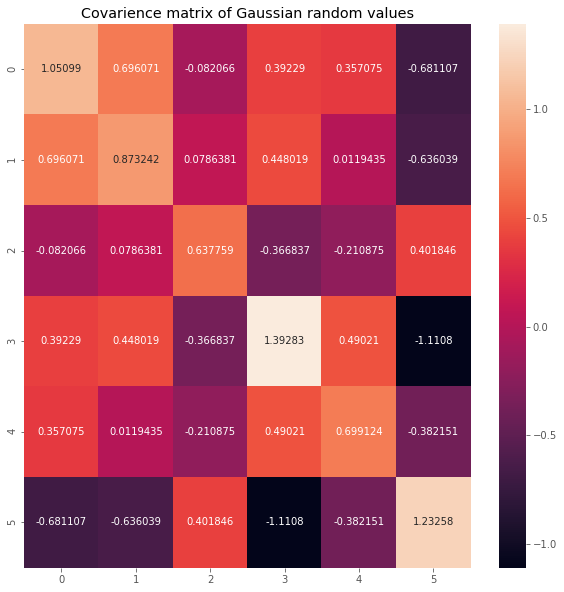

In [9]:
from scipy.stats import norm

# Considersix Gaussian distributions from which you are sampling some values
# Ten different values are taken
values = norm.rvs(size=10, loc=0, scale=1)

plt.figure(figsize=(15,6))
plt.title('Series of Gaussian random values')
plt.plot(values, label='0')

for i in range(5) :
    val = norm.rvs(size=10, loc=0, scale=1)
    values = np.vstack([values, val])
    plt.plot(val, label=i+1)
plt.legend()
plt.show()

# Which two curves have the closest correlation
cov_mtx = np.cov(values, bias=True)
plt.figure(figsize=(10,10))
plt.title('Covarience matrix of Gaussian random values')
sns.heatmap(cov_mtx, annot=True, fmt='g')
plt.show()

### Probability

### Random Variables

A variable defining an outcome of a random event. For example, outcome of a coin toss is defined by a random variable $X$ which can take values $\in \{0,1\}$. Random variables can be discrete or continuous. 

### Probability Mass Function

Function that maps a discrete value taken by a random variable to the probability that random variable can take the value. The PMF defines the probability distribution over a random variable.

### Probability Density Function

Same as PMF but defined for continuous random variables.

### Cumulative Distribution Function

Probability that $X$ will take a value less than or equal to $X=x$.

#### Resources
[Common probability distributions with visualization](https://www.datacamp.com/community/tutorials/probability-distributions-python)

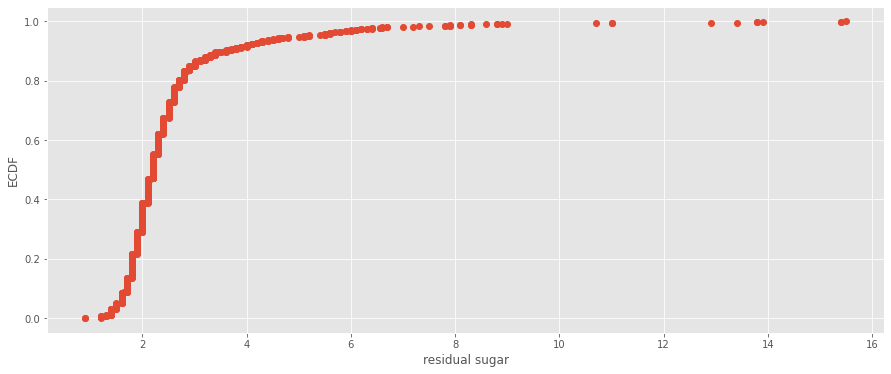

In [0]:
# CDF
x = np.sort(df['residual sugar'])
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

plt.figure(figsize=(15,6))
plt.plot(x, y, marker='o', linestyle='')
plt.ylabel('ECDF')
plt.xlabel('residual sugar')
plt.show()


***Exercise!***

*Central Limit Theorem*: Distribution of mean of sample approximates a normal distribution of increasing sample sizes.